# Part 1: Data Exploration and Preparation


## - Load the dataset 

In [1]:

#importing pandas & numpy libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Disable warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:

#loading dataset

df = pd.read_csv('twitter_disaster.csv')
df.head().style.background_gradient(cmap='coolwarm')


,id,keyword,location,text,target
0,1,nan,nan,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,nan,nan,Forest fire near La Ronge Sask. Canada,1
2,5,nan,nan,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,nan,nan,"13,000 people receive #wildfires evacuation orders in California",1
4,7,nan,nan,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


## Explore the dataset&#39;s structure using Python libraries like Pandas to understand the columns and data types.

In [3]:

#check shape of data

df.shape


(7613, 5)

### The dataset contains 7,613 rows and 5 columns

In [4]:
df.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [5]:
# check null values

df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [6]:

#checking information about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [7]:
#checking Description 

df.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [8]:
missing_cols = ['keyword', 'location']
for df in [df]:
    for col in ['keyword', 'location']:
        df[col] = df[col].fillna(f'no_{col}')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7613 non-null   object
 2   location  7613 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [10]:
# dropping the id column

df.drop(["id"], axis = 1, inplace = True)

In [11]:
df

,keyword,location,text,target
0,no_keyword,no_location,Our Deeds are the Reason of this #earthquake M...,1
1,no_keyword,no_location,Forest fire near La Ronge Sask. Canada,1
2,no_keyword,no_location,All residents asked to 'shelter in place' are ...,1
3,no_keyword,no_location,"13,000 people receive #wildfires evacuation or...",1
4,no_keyword,no_location,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...
7608,no_keyword,no_location,Two giant cranes holding a bridge collapse int...,1
7609,no_keyword,no_location,@aria_ahrary @TheTawniest The out of control w...,1
7610,no_keyword,no_location,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,no_keyword,no_location,Police investigating after an e-bike collided ...,1


In [12]:
df['text'].isna().sum()

0

In [13]:
df['keyword'].unique()

array(['no_keyword', 'ablaze', 'accident', 'aftershock',
       'airplane%20accident', 'ambulance', 'annihilated', 'annihilation',
       'apocalypse', 'armageddon', 'army', 'arson', 'arsonist', 'attack',
       'attacked', 'avalanche', 'battle', 'bioterror', 'bioterrorism',
       'blaze', 'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard',
       'blood', 'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'dera

## - Visualize the distribution of classes (disaster vs. non-disaster tweets) using histograms or bar plots.

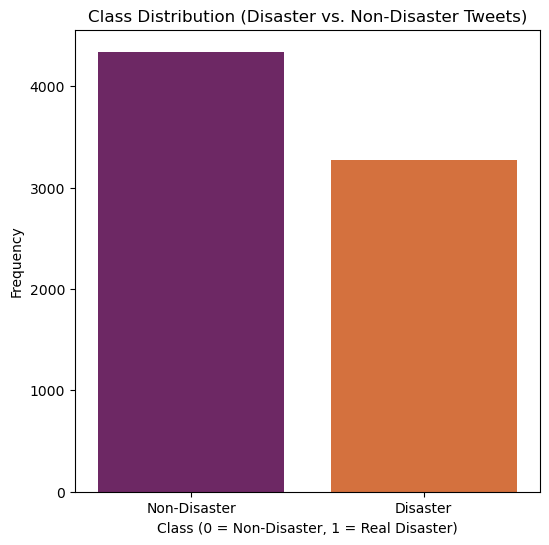

In [14]:
distribution = df.target.value_counts()

plt.figure(figsize=(6, 6))
sns.barplot(x=distribution.index, y=distribution.values, palette="inferno")
plt.title("Class Distribution (Disaster vs. Non-Disaster Tweets)")
plt.xlabel("Class (0 = Non-Disaster, 1 = Real Disaster)")
plt.ylabel("Frequency")
plt.xticks(ticks=[0, 1], labels=["Non-Disaster", "Disaster"])
plt.show()

### Here, The dataset is slightly imbalanced, non-disaster Tweets is more than the disaster Tweets .

## - Analyze the frequency of keywords and phrases associated with disaster tweets.


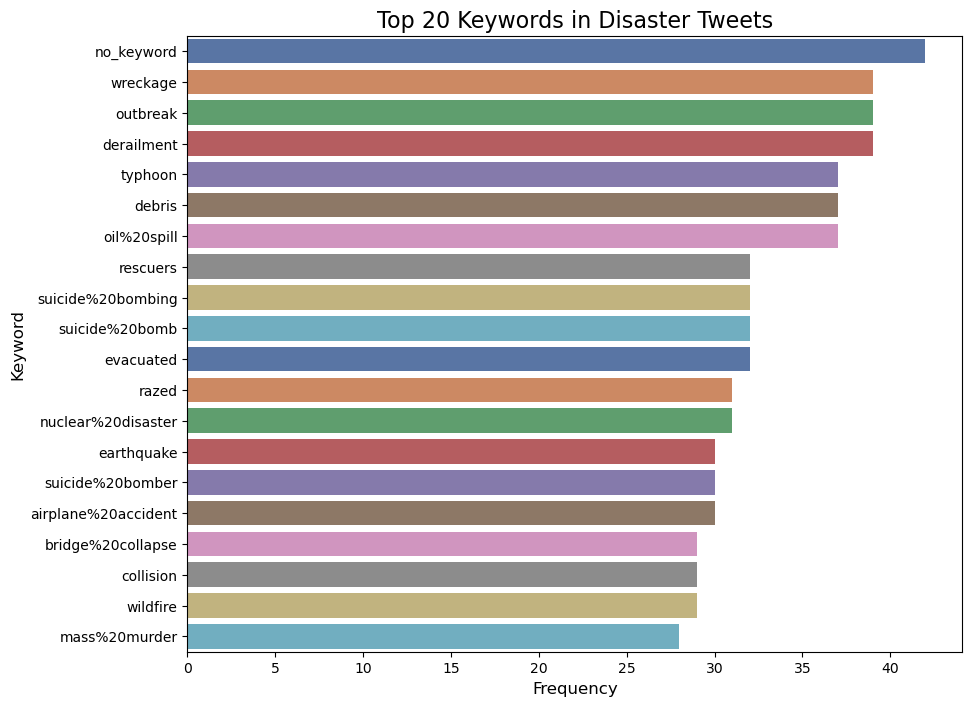

,keyword,frequency
0,no_keyword,42
219,wreckage,39
153,outbreak,39
70,derailment,39
205,typhoon,37
62,debris,37
152,oil%20spill,37
166,rescuers,32
187,suicide%20bombing,32
185,suicide%20bomb,32


In [20]:
from collections import Counter

# Filtering disaster tweets (target = 1) and keywords extraction
dis_filter_tweets = df[df['target'] == 1]
keywords = dis_filter_tweets['keyword'].dropna()

# Counting keyword frequency 
keywords_counts = Counter(keywords)

# Converting into a DataFrame
keywords_df = pd.DataFrame(keywords_counts.items(), columns=['keyword', 'frequency']).sort_values(by='frequency', ascending=False)

# Display the top 20 keywords
top_20_keywords = keywords_df.head(20)

# Plot the top keywords
plt.figure(figsize=(10, 8))
sns.barplot(data=top_20_keywords, x='frequency', y='keyword', palette='deep')
plt.title("Top 20 Keywords in Disaster Tweets", fontsize=16)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Keyword", fontsize=12)
plt.show()

top_20_keywords


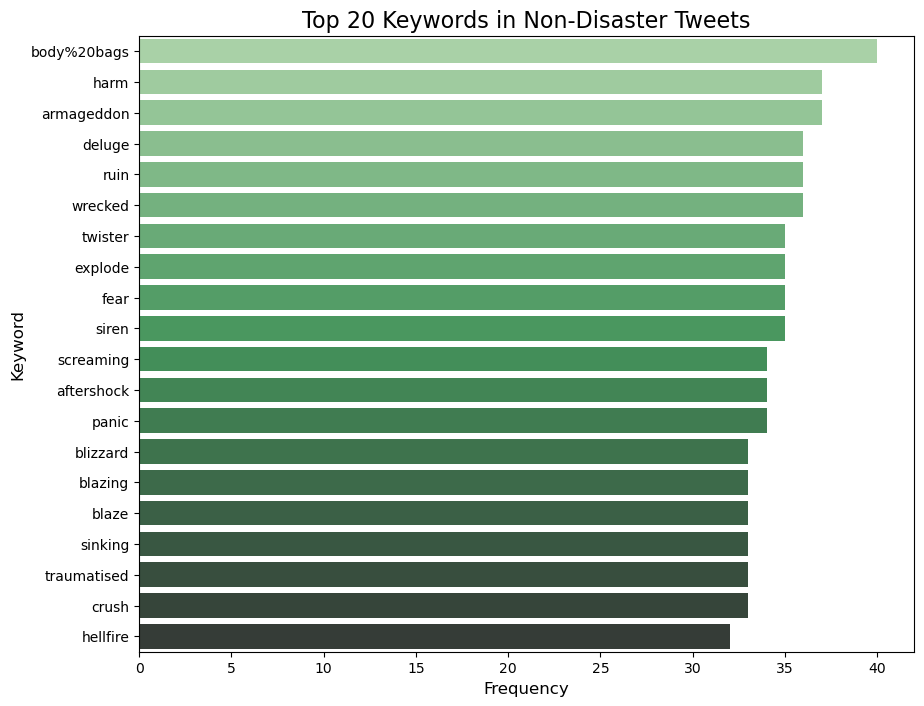

,keyword,frequency
30,body%20bags,40
118,harm,37
9,armageddon,37
63,deluge,36
169,ruin,36
218,wrecked,36
203,twister,35
97,explode,35
105,fear,35
177,siren,35


In [16]:
from collections import Counter

non_dis_filter_tweets = df[df['target'] == 0]
non_disaster_keywords = non_dis_filter_tweets['keyword'].dropna()

# Counting keyword frequency 
keywords_counts = Counter(non_disaster_keywords)

# Converting into a DataFrame
keywords_df = pd.DataFrame(keywords_counts.items(), columns=['keyword', 'frequency']).sort_values(by='frequency', ascending=False)

# Display the top 20 keywords
top_20_keywords = keywords_df.head(20)

# Plot the top keywords
plt.figure(figsize=(10, 8))
sns.barplot(data=top_20_keywords, x='frequency', y='keyword', palette='Greens_d')
plt.title("Top 20 Keywords in Non-Disaster Tweets", fontsize=16)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Keyword", fontsize=12)
plt.show()

# Display the top 20 keywords DataFrame
top_20_keywords

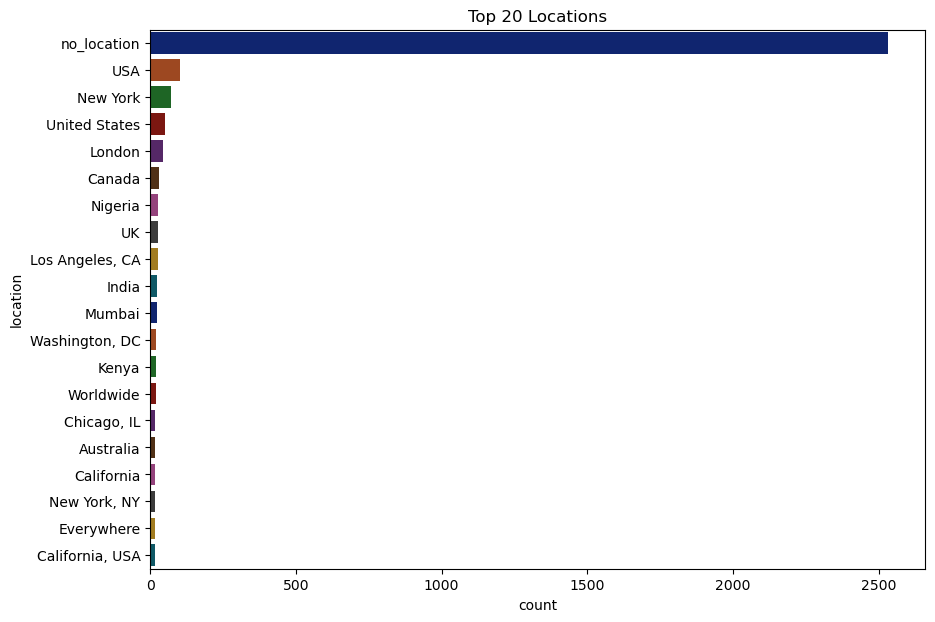

In [17]:
# top 20 location of tweets 

locations = df["location"].value_counts()

plt.figure(figsize=(10,7))

sns.barplot(y=locations[0:20].index, x=locations[0:20], orient='h',palette='dark')

plt.title("Top 20 Locations")
plt.show()

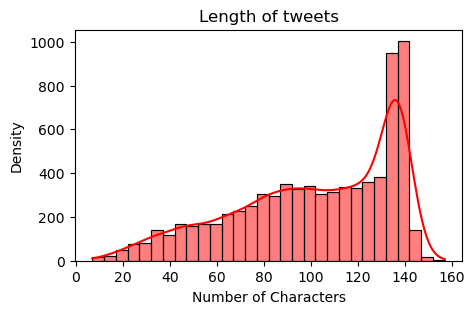

In [18]:
# plot tweet length 

df["length"]  = df["text"].apply(len)

df[df['length']==150]['text'].iloc[0]

plt.figure(figsize=(5,3))
sns.histplot(df["length"], kde=True,color='red',bins=30)
plt.title("Length of tweets")
plt.xlabel("Number of Characters")
plt.ylabel("Density")
plt.show()

### The distribution is right-skewed, with most tweets having lengths between 120 to 140 characters. This indicates that users often use nearly the maximum allowable characters in their tweets.

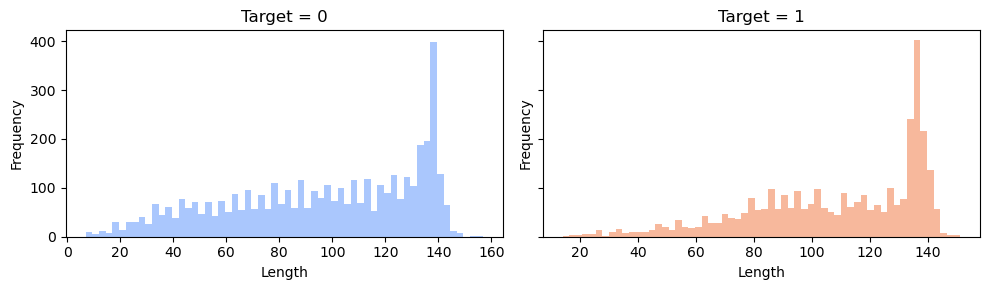

In [19]:
palette = sns.color_palette("coolwarm", 2)
fig, axes = plt.subplots(1, 2, figsize=(10, 3), sharey=True)

for target, ax, color in zip([0, 1], axes, palette):
    subset = df[df['target'] == target]
    ax.hist(subset['length'], bins=60, color=color, edgecolor='none')
    ax.set_title(f"Target = {target}")
    ax.set_xlabel("Length")
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()


### Both have a clear peak near 140 characters, suggesting that tweets, regardless of category, often utilize the full character limit.

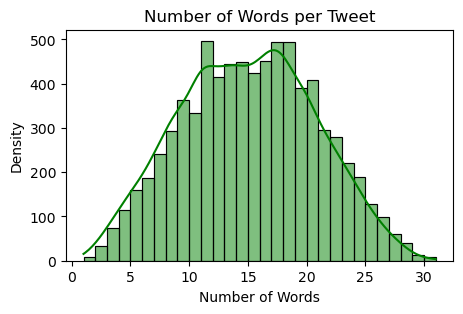

In [20]:
def count_words(x):
    return len(x.split())

df["num_words"] = df["text"].apply(count_words)

plt.figure(figsize=(5,3))
sns.histplot(df["num_words"],kde=True,color='green',bins=30)
plt.title("Number of Words per Tweet")
plt.xlabel("Number of Words")
plt.ylabel("Density")
plt.show() 

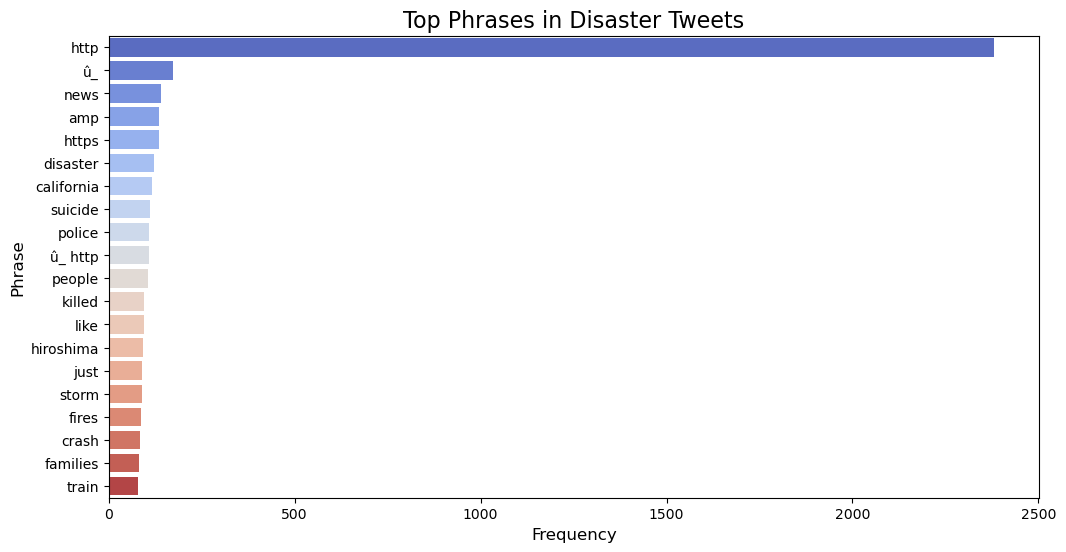

,phrase,frequency
7,http,2382
18,û_,172
12,news,140
0,amp,135
8,https,134
3,disaster,121
1,california,115
16,suicide,112
14,police,109
19,û_ http,109


In [21]:
from sklearn.feature_extraction.text import CountVectorizer

#here we will Preprocess disaster tweets (filtering target = 1)
disaster_texts = dis_filter_tweets['text'].dropna()

# Creating a CountVectorizer for unigrams, bigrams, and trigrams
count_vectorizer = CountVectorizer(ngram_range=(1, 3), stop_words='english', max_features=20)
X = count_vectorizer.fit_transform(disaster_texts)

# Get the feature names and their frequencies
phrases = count_vectorizer.get_feature_names_out()
frequencies = X.sum(axis=0).A1

# Combining phrases and frequencies into a DataFrame
df_phrases = pd.DataFrame({'phrase': phrases, 'frequency': frequencies}).sort_values(by='frequency', ascending=False)

# Bar Plot for the phrases
plt.figure(figsize=(12, 6))
sns.barplot(data=df_phrases, x='frequency', y='phrase', palette='coolwarm')
plt.title("Top Phrases in Disaster Tweets", fontsize=16)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Phrase", fontsize=12)
plt.show()

df_phrases 



## Task: Data Preparation

## - Clean the text data by removing special characters, URLs, and punctuation marks.

In [22]:
import re
import string

def clean_text(text):

    # Removing URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Removing special characters and punctuation
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'$', '', text)
    
    # Remove HTML beacon
    html=re.compile(r'<.*?>')

    # Remove non printable characters
    text = ''.join([word for word in text if word in string.printable])
    
    # Converting text to lowercase
    text = text.lower()
    return text

  

df['cleaned_text'] = df['text'].apply(clean_text)
df[['text', 'cleaned_text']].head()


,text,cleaned_text
0,Our Deeds are the Reason of this #earthquake M...,our deeds are the reason of this earthquake ma...
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,all residents asked to shelter in place are be...
3,"13,000 people receive #wildfires evacuation or...",13000 people receive wildfires evacuation orde...
4,Just got sent this photo from Ruby #Alaska as ...,just got sent this photo from ruby alaska as s...


In [23]:
df["cleaned_text"] = df["cleaned_text"].apply(clean_text)

In [24]:
df.head()

,keyword,location,text,target,length,num_words,cleaned_text
0,no_keyword,no_location,Our Deeds are the Reason of this #earthquake M...,1,69,13,our deeds are the reason of this earthquake ma...
1,no_keyword,no_location,Forest fire near La Ronge Sask. Canada,1,38,7,forest fire near la ronge sask canada
2,no_keyword,no_location,All residents asked to 'shelter in place' are ...,1,133,22,all residents asked to shelter in place are be...
3,no_keyword,no_location,"13,000 people receive #wildfires evacuation or...",1,65,8,13000 people receive wildfires evacuation orde...
4,no_keyword,no_location,Just got sent this photo from Ruby #Alaska as ...,1,88,16,just got sent this photo from ruby alaska as s...


In [25]:
cleaned_len = df['cleaned_text'].apply(len)
cleaned_len

0        68
1        37
2       130
3        63
4        86
       ... 
7608     61
7609    120
7610     37
7611    132
7612     70
Name: cleaned_text, Length: 7613, dtype: int64

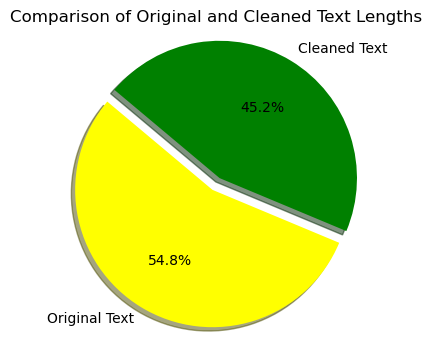

In [26]:
# Calculate the total lengths of the original and cleaned text
total_original_length = df['text'].str.len().sum()
total_cleaned_length = df['cleaned_text'].str.len().sum()

# Data for pie chart
labels = ['Original Text', 'Cleaned Text']
sizes = [total_original_length, total_cleaned_length]
colors = ['yellow', 'green']
explode = (0.1, 0) 

plt.figure(figsize=(4, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)

plt.title('Comparison of Original and Cleaned Text Lengths')
plt.axis('equal') 

plt.show()

## - Tokenize the text into individual words or tokens

In [27]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english')) #Using NLTK's predefined set of common words like the, and, is
lemmatizer = WordNetLemmatizer() #Converting words to their base form

def preprocess_text(text):

    # Tokenizing the text
    tokens = word_tokenize(text) #Contains a list of cleaned, meaningful tokens for each tweet
    
    # Removing stop words and lemmatize each token
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return tokens

df['tokens'] = df['cleaned_text'].apply(preprocess_text)
df[['cleaned_text', 'tokens']].head()



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,cleaned_text,tokens
0,our deeds are the reason of this earthquake ma...,"[deed, reason, earthquake, may, allah, forgive..."
1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]"
2,all residents asked to shelter in place are be...,"[resident, asked, shelter, place, notified, of..."
3,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfire, evacuation,..."
4,just got sent this photo from ruby alaska as s...,"[got, sent, photo, ruby, alaska, smoke, wildfi..."


## - Convert text labels into numerical format (e.g., 0 for non-disaster, 1 for disaster).

In [28]:
df['target'].dtypes

dtype('int64')

In [29]:
print(df['target'].value_counts())


target
0    4342
1    3271
Name: count, dtype: int64


## - Split the dataset into training and testing sets for model development and evaluation

In [30]:
from sklearn.model_selection import train_test_split

X = df['cleaned_text']  
y = df['target']   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")
print(f"y Training set size: {len(y_train)}")
print(f"y Testing set size: {len(y_test)}")

Training set size: 6090
Testing set size: 1523
y Training set size: 6090
y Testing set size: 1523


# Part 2: Feature Engineering and Model Selection


## Task: Feature Engineering

## - Extract relevant features from the text data, such as word frequencies, TF-IDF scores, and sentiment analysis.

In [31]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download NLTK sentiment analysis data
nltk.download('vader_lexicon')

# Initialize vectorizers and sentiment analyzer
count_vectorizer = CountVectorizer(max_features=1000, stop_words='english')
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
sia = SentimentIntensityAnalyzer()

# Extract features using CountVectorizer
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

# Extract features using TfidfVectorizer
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Perform sentiment analysis
df['sentiment'] = df['cleaned_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Display some examples of features and sentiment scores
feature_examples = {
    "Top CountVectorizer Features": count_vectorizer.get_feature_names_out()[:10],
    "Top TF-IDF Features": tfidf_vectorizer.get_feature_names_out()[:10],
    "Sentiment Analysis Examples": df[['cleaned_text', 'sentiment']].head().to_dict(orient='records'),
}

feature_examples


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'Top CountVectorizer Features': array(['05', '10', '100', '11', '11yearold', '12', '12000', '13', '15',
        '16'], dtype=object),
 'Top TF-IDF Features': array(['05', '10', '100', '11', '11yearold', '12', '12000', '13', '15',
        '16'], dtype=object),
 'Sentiment Analysis Examples': [{'cleaned_text': 'our deeds are the reason of this earthquake may allah forgive us all',
   'sentiment': 0.2732},
  {'cleaned_text': 'forest fire near la ronge sask canada',
   'sentiment': -0.34},
  {'cleaned_text': 'all residents asked to shelter in place are being notified by officers no other evacuation or shelter in place orders are expected',
   'sentiment': -0.296},
  {'cleaned_text': '13000 people receive wildfires evacuation orders in california ',
   'sentiment': 0.0},
  {'cleaned_text': 'just got sent this photo from ruby alaska as smoke from wildfires pours into a school ',
   'sentiment': 0.0}]}

In [32]:
# Sentiment Analysis (using count of positive/negative words)

positive_words = ['good', 'great', 'happy', 'love', 'safe', 'relief', 'calm']
negative_words = ['bad', 'disaster', 'danger', 'fire', 'flood', 'death', 'destroy', 'collapse']

def sentiment_analysis(tokens):
    positive_count = sum(1 for word in tokens if word in positive_words)
    negative_count = sum(1 for word in tokens if word in negative_words)
    return positive_count - negative_count

df['sentiment'] = df['tokens'].apply(sentiment_analysis)

# features extracted
feature_extracted = {
    "Word Frequency Shape": X_train_count.shape,
    "TF-IDF Shape": X_train_tfidf.shape,
    "Sentiment Analysis Sample": df[['text', 'sentiment']].head()
}

feature_extracted


{'Word Frequency Shape': (6090, 1000),
 'TF-IDF Shape': (6090, 1000),
 'Sentiment Analysis Sample':                                                 text  sentiment
 0  Our Deeds are the Reason of this #earthquake M...          0
 1             Forest fire near La Ronge Sask. Canada         -1
 2  All residents asked to 'shelter in place' are ...          0
 3  13,000 people receive #wildfires evacuation or...          0
 4  Just got sent this photo from Ruby #Alaska as ...          0}

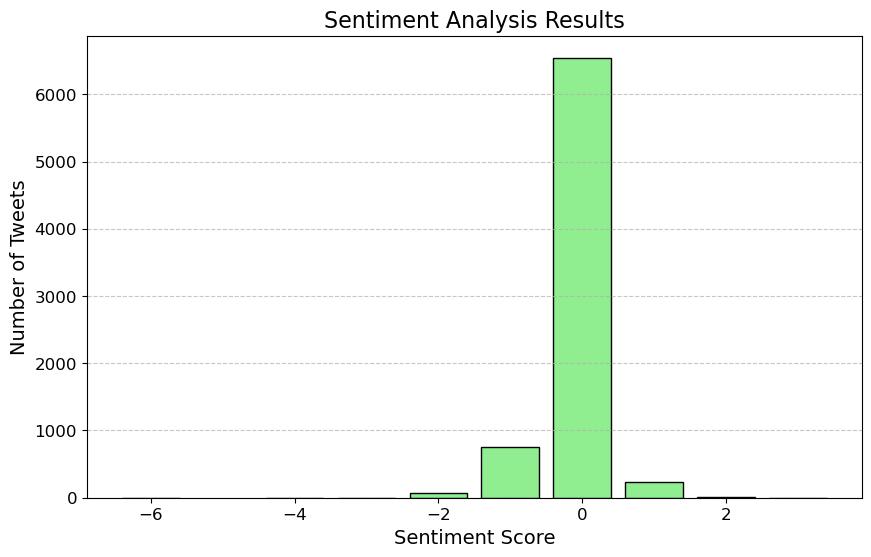

In [33]:
# Counting the sentiment values
sentiment_counts = df['sentiment'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color='lightgreen', edgecolor='black')
plt.title('Sentiment Analysis Results', fontsize=16)
plt.xlabel('Sentiment Score', fontsize=14)
plt.ylabel('Number of Tweets', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### The majority of Tweets have a sentiment score of 0, and most Tweets are based on a pre-defined list and show no strong use of positive or negative words.
#### There are significantly fewer tweets with negative sentiment scores (e.g. -1, -2), and fewer tweets with positive sentiment scores. Slant toward a neutral or slightly negative score means that the tweet does not contain strong emotional words overall, or that it does not respond to negative events (e.g. disasters).

## -Consider using pre-trained word embeddings like Word2Vec or GloVe to capture semantic meanings

In [34]:
def load_glove_embeddings(file_path, embedding_dim):
    embeddings_index = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.array(values[1:], dtype='float32')
            embeddings_index[word] = vector
    print(f"Loaded {len(embeddings_index)} word vectors.")
    return embeddings_index

# Path to GloVe embeddings file (update the path)
glove_path = "https://drive.google.com/file/d/1P57AT8--HKZqsdmsxxI2VMyMNUsClLLp/view?usp=sharing"
embedding_dim = 200
glove_embeddings = load_glove_embeddings(glove_path, embedding_dim)


Loaded 400000 word vectors.


In [35]:
def text_to_embeddings(text, embeddings_index, embedding_dim):
    tokens = text.split()
    vectors = [embeddings_index.get(token, np.zeros(embedding_dim)) for token in tokens]
    if len(vectors) == 0:  # Handle empty sentences
        return np.zeros(embedding_dim)
    return np.mean(vectors, axis=0)

# Apply the function to your dataset
df['embeddings'] = df['cleaned_text'].apply(lambda x: text_to_embeddings(x, glove_embeddings, embedding_dim))

# Convert the embeddings column to a NumPy array for modeling
X_embeddings = np.array(df['embeddings'].tolist())
y = df['target'].values  # Ensure labels are in a separate array


## - Experiment with additional features like tweet length, presence of hashtags, or user mentions.

In [36]:
#Compute Tweet Length

df['tweet_length'] = df['cleaned_text'].apply(len)
df['tweet_length']

0        68
1        37
2       130
3        63
4        86
       ... 
7608     61
7609    120
7610     37
7611    132
7612     70
Name: tweet_length, Length: 7613, dtype: int64

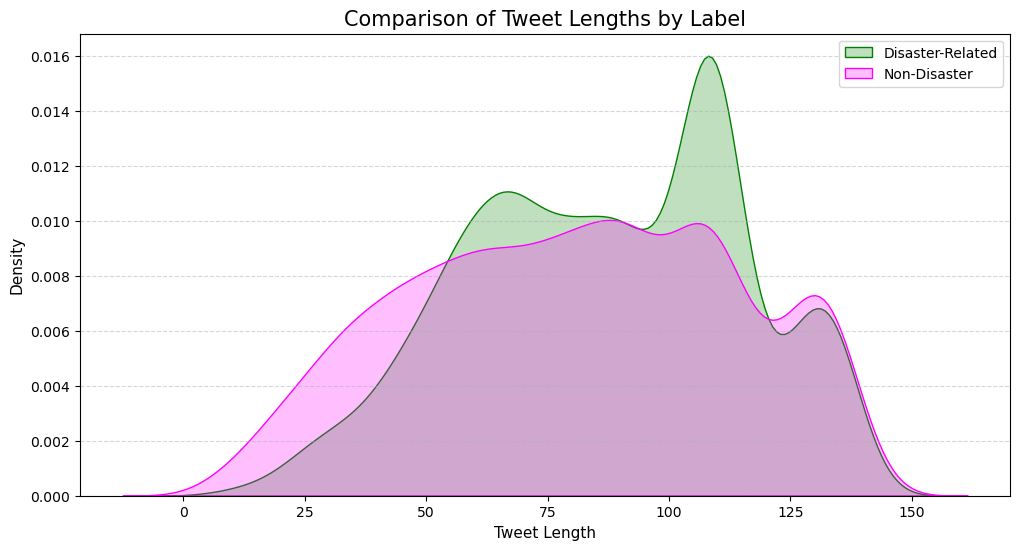

In [37]:
# Separating tweets based on disaster tweets/non disaster tweets
disaster_tweets = df[df['target'] == 1]
non_disaster_tweets = df[df['target'] == 0]

plt.figure(figsize=(12, 6))
sns.kdeplot(disaster_tweets['tweet_length'], label='Disaster-Related', color='green', fill=True)
sns.kdeplot(non_disaster_tweets['tweet_length'], label='Non-Disaster', color='magenta', fill=True)

plt.title('Comparison of Tweet Lengths by Label', fontsize=15)
plt.xlabel('Tweet Length', fontsize=11)
plt.ylabel('Density', fontsize=11)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


### Tweets about disasters may cover a slightly wider range of topics and frequently need more characters to provide comprehensive information (e.g., emergency updates, directions, or reports).
### Casual or personal messages, which are usually shorter, may be included in non-disaster tweets.

In [38]:
# Number of words in the tweet
df['word_count'] = df['cleaned_text'].apply(lambda x: len(x.split()))
df['word_count']


0       13
1        7
2       22
3        8
4       16
        ..
7608    10
7609    20
7610     7
7611    19
7612    11
Name: word_count, Length: 7613, dtype: int64

In [39]:
#Check for Hashtags

df['has_hashtag'] = df['text'].apply(lambda x: 1 if '#' in x else 0)
df['has_hashtag'].unique()

array([1, 0], dtype=int64)

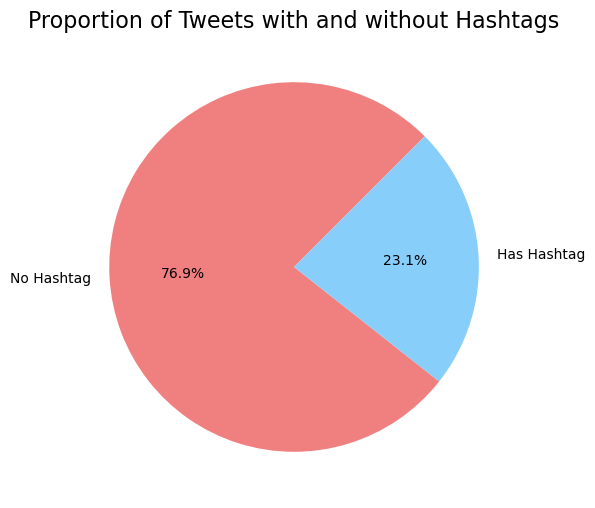

In [40]:
# Example counts for tweets with and without hashtags
hashtag_counts = [len(df[df['has_hashtag'] == 0]), len(df[df['has_hashtag'] == 1])]  # Adjust as per column names
labels = ['No Hashtag', 'Has Hashtag']

# Ensure hashtag_counts has the same length as labels
if len(hashtag_counts) != len(labels):
    raise ValueError(f"'labels' must be of length {len(hashtag_counts)}, but got {len(labels)}")

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    hashtag_counts, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=45, 
    colors=['lightcoral', 'lightskyblue']
)
plt.title('Proportion of Tweets with and without Hashtags', fontsize=16)
plt.show()


### Observations:

### Tweets Without Hashtags:  A larger portion of tweets do not contain hashtags, suggesting that hashtags are not universally used.

### Tweets With Hashtags:  A smaller proportion of tweets include hashtags, which might indicate more structured or targeted communication, such as trending topics or campaigns.

In [41]:
#Check for User Mentions
df['has_user_mention'] = df['text'].apply(lambda x: 1 if '@' in x else 0)
df['has_user_mention']

0       0
1       0
2       0
3       0
4       0
       ..
7608    0
7609    1
7610    0
7611    0
7612    0
Name: has_user_mention, Length: 7613, dtype: int64

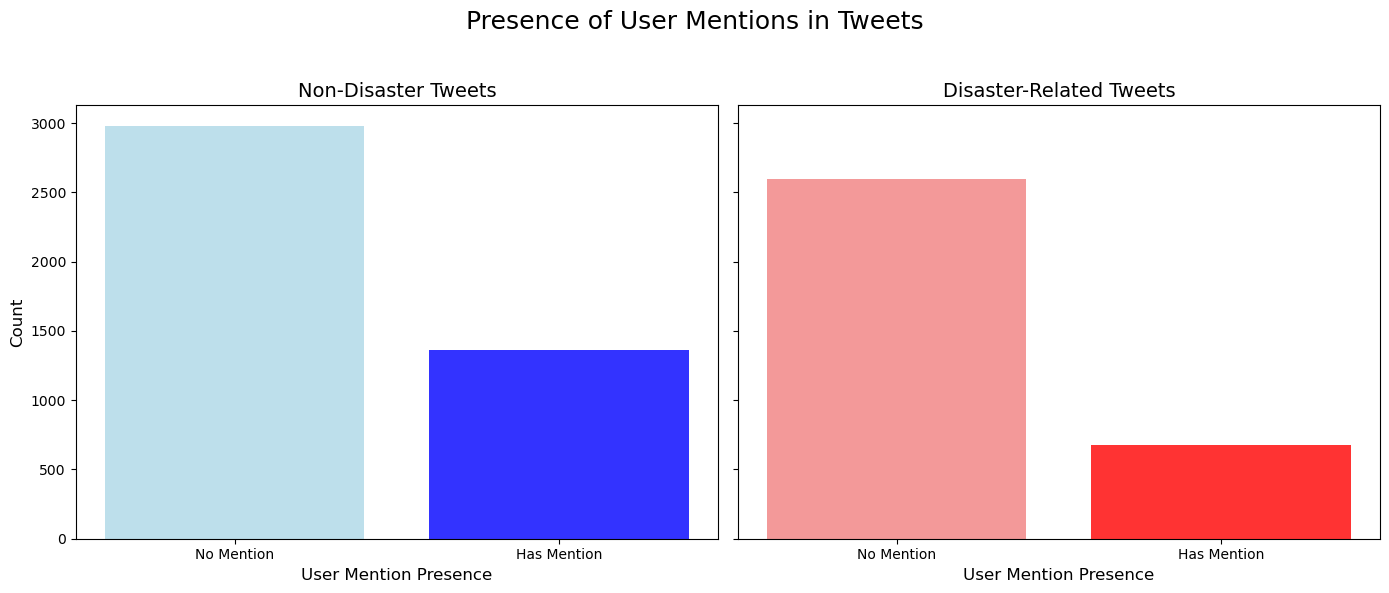

In [42]:
def user_mention_comparison_subplot(data, target_col, mention_col):

    disaster_tweets = df[df[target_col] == 1]
    non_disaster_tweets = df[df[target_col] == 0]

    # Calculate counts for each class
    disaster_mention_counts = disaster_tweets[mention_col].value_counts()
    non_disaster_mention_counts = non_disaster_tweets[mention_col].value_counts()

    # Create subplot
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
    fig.suptitle('Presence of User Mentions in Tweets', fontsize=18)

    # Plot for non-disaster tweets
    axes[0].bar(['No Mention', 'Has Mention'], non_disaster_mention_counts, color=['lightblue', 'blue'], alpha=0.8)
    axes[0].set_title('Non-Disaster Tweets', fontsize=14)
    axes[0].set_ylabel('Count', fontsize=12)
    axes[0].set_xlabel('User Mention Presence', fontsize=12)

    # Plot for disaster tweets
    axes[1].bar(['No Mention', 'Has Mention'], disaster_mention_counts, color=['lightcoral', 'red'], alpha=0.8)
    axes[1].set_title('Disaster-Related Tweets', fontsize=14)
    axes[1].set_xlabel('User Mention Presence', fontsize=12)

    # Adjust layout and show
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# subplot
user_mention_comparison_subplot(data=df, target_col='target', mention_col='has_user_mention')


###  Insights
### Both classes show a higher prevalence of tweets without mentions.
### Disaster-related tweets may slightly favor user mentions compared to non-disaster tweets, aligning with scenarios where specific entities are tagged for assistance or awareness.

In [43]:
# additional features
some_additional_features = df[['cleaned_text', 'tweet_length', 'word_count', 'has_hashtag', 'has_user_mention']].head()

some_additional_features

,cleaned_text,tweet_length,word_count,has_hashtag,has_user_mention
0,our deeds are the reason of this earthquake ma...,68,13,1,0
1,forest fire near la ronge sask canada,37,7,0,0
2,all residents asked to shelter in place are be...,130,22,0,0
3,13000 people receive wildfires evacuation orde...,63,8,1,0
4,just got sent this photo from ruby alaska as s...,86,16,1,0


## Choose a set of candidate classification models suitable for text classification, such as logistic regression, random forests, or neural networks.

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = vectorizer.fit_transform(df['cleaned_text'])
y = df['target']


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_embeddings, y, test_size=0.2, random_state=42)

# Train a logistic regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Evaluate the model
y_pred = lr_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       874
           1       0.80      0.70      0.75       649

    accuracy                           0.80      1523
   macro avg       0.80      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523



In [46]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       874
           1       0.83      0.70      0.76       649

    accuracy                           0.81      1523
   macro avg       0.82      0.80      0.80      1523
weighted avg       0.82      0.81      0.81      1523



In [47]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       874
           1       0.81      0.69      0.75       649

    accuracy                           0.80      1523
   macro avg       0.80      0.78      0.79      1523
weighted avg       0.80      0.80      0.80      1523



In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize and pad text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['cleaned_text'])
sequences = tokenizer.texts_to_sequences(df['cleaned_text'])
padded_sequences = pad_sequences(sequences, maxlen=50, padding='post')

# Prepare embedding matrix
word_index = tokenizer.word_index
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = glove_embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Build the LSTM model
model = Sequential([
    Embedding(input_dim=len(word_index) + 1, output_dim=embedding_dim, 
              weights=[embedding_matrix], input_length=50, trainable=False),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(padded_sequences, y, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.6912 - loss: 0.5969 - val_accuracy: 0.7242 - val_loss: 0.5551
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.7481 - loss: 0.5450 - val_accuracy: 0.7905 - val_loss: 0.5713
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.6952 - loss: 0.5823 - val_accuracy: 0.5345 - val_loss: 0.6668
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.5808 - loss: 0.6349 - val_accuracy: 0.5345 - val_loss: 0.6338
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.6025 - loss: 0.6228 - val_accuracy: 0.6500 - val_loss: 0.6195
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.6350 - loss: 0.6151 - val_accuracy: 0.7374 - val_loss: 0.5732
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.7350 - loss: 0.5818 - val_accuracy: 0.7341 - val_loss: 0.5743
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.6674 - loss: 0.6229 - val_acc

### Here, we can see that RandomForestClassifier gives Accuracy = 0.81, which is better than the other models.

## Train each model using the training data and evaluate their performance using cross- validation techniques

In [49]:
from sklearn.model_selection import cross_val_score

# Define models
models = {
    'SVM': SVC(kernel='linear', C=1.0, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Evaluate each model
results = {}
for name, model in models.items():
    print(f"Evaluating {name}...")
    scores = cross_val_score(model, X_embeddings, y, cv=5, scoring='accuracy')  # 5-fold CV
    results[name] = scores
    print(f"{name} Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")


Evaluating SVM...
SVM Accuracy: 0.7654 ± 0.0258
Evaluating Logistic Regression...
Logistic Regression Accuracy: 0.7676 ± 0.0225
Evaluating Random Forest...
Random Forest Accuracy: 0.7716 ± 0.0187


In [50]:
from sklearn.model_selection import cross_validate

scoring = ['accuracy', 'precision', 'recall', 'f1']

# Evaluate each model
results_multi = {}
for name, model in models.items():
    print(f"Cross-validating {name}...")
    scores = cross_validate(model, X_embeddings, y, cv=5, scoring=scoring)
    results_multi[name] = scores
    print(f"{name} Results:")
    print(f"  Accuracy: {scores['test_accuracy'].mean():.4f} ± {scores['test_accuracy'].std():.4f}")
    print(f"  Precision: {scores['test_precision'].mean():.4f} ± {scores['test_precision'].std():.4f}")
    print(f"  Recall: {scores['test_recall'].mean():.4f} ± {scores['test_recall'].std():.4f}")
    print(f"  F1-Score: {scores['test_f1'].mean():.4f} ± {scores['test_f1'].std():.4f}")


Cross-validating SVM...
SVM Results:
  Accuracy: 0.7654 ± 0.0258
  Precision: 0.7649 ± 0.0374
  Recall: 0.6573 ± 0.0439
  F1-Score: 0.7061 ± 0.0346
Cross-validating Logistic Regression...
Logistic Regression Results:
  Accuracy: 0.7676 ± 0.0225
  Precision: 0.7570 ± 0.0314
  Recall: 0.6784 ± 0.0481
  F1-Score: 0.7144 ± 0.0311
Cross-validating Random Forest...
Random Forest Results:
  Accuracy: 0.7716 ± 0.0187
  Precision: 0.7829 ± 0.0335
  Recall: 0.6500 ± 0.0263
  F1-Score: 0.7097 ± 0.0227


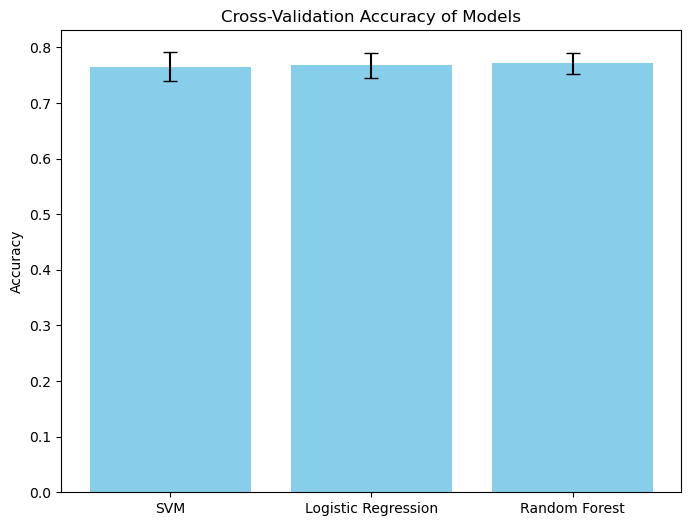

In [51]:
model_names = list(results.keys())
mean_scores = [scores.mean() for scores in results.values()]
std_scores = [scores.std() for scores in results.values()]

# Plot
plt.figure(figsize=(8, 6))
plt.bar(model_names, mean_scores, yerr=std_scores, capsize=5, color='skyblue')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy of Models')
plt.show()


### We can see Random forest giving better accuracy than other models

## - Optimize hyperparameters of the selected models using techniques like grid search or random search.

In [52]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Initialize Grid Search with Cross-Validation
grid_search_svm = GridSearchCV(
    SVC(),
    param_grid,
    scoring='f1',  # Use F1-score for binary classification
    cv=5,          # 5-fold cross-validation
    verbose=1,
    n_jobs=-1       # Use all available cores
)

# Fit the grid search to the data
grid_search_svm.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters for SVM:", grid_search_svm.best_params_)
print("Best F1-Score for SVM:", grid_search_svm.best_score_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best F1-Score for SVM: 0.7515892098629718


## Part 3: Model Evaluation and Validation

## - Evaluate the trained models using appropriate evaluation metrics for binary classification tasks, such as accuracy, precision, recall, and F1-score.

In [60]:
# Example: Making predictions with a trained model
y_pred_svm = svm_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)


In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Example function to evaluate a model
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print(f"Evaluation Metrics for {model_name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print("-" * 30)

# Evaluate each model
evaluate_model(y_test, y_pred_svm, "SVM")
evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")


Evaluation Metrics for SVM:
  Accuracy: 0.7984
  Precision: 0.8076
  Recall: 0.6918
  F1-Score: 0.7452
------------------------------
Evaluation Metrics for Logistic Regression:
  Accuracy: 0.7978
  Precision: 0.7976
  Recall: 0.7042
  F1-Score: 0.7480
------------------------------
Evaluation Metrics for Random Forest:
  Accuracy: 0.8135
  Precision: 0.8336
  Recall: 0.7026
  F1-Score: 0.7625
------------------------------


In [62]:
from sklearn.metrics import classification_report

# Generate classification reports
print("Classification Report for SVM:")
print(classification_report(y_test, y_pred_svm))

print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))


Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       874
           1       0.81      0.69      0.75       649

    accuracy                           0.80      1523
   macro avg       0.80      0.78      0.79      1523
weighted avg       0.80      0.80      0.80      1523

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       874
           1       0.80      0.70      0.75       649

    accuracy                           0.80      1523
   macro avg       0.80      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       874
           1       0.83      0.70      0.76       649

    accuracy                           0.81      1523
   macro 

In [63]:
# Store metrics in a DataFrame for comparison
metrics = {
    "Model": ["SVM", "Logistic Regression", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf)
    ],
    "Precision": [
        precision_score(y_test, y_pred_svm),
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_rf)
    ],
    "Recall": [
        recall_score(y_test, y_pred_svm),
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_rf)
    ],
    "F1-Score": [
        f1_score(y_test, y_pred_svm),
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_rf)
    ]
}

metrics_df = pd.DataFrame(metrics)
print(metrics_df)


                 Model  Accuracy  Precision    Recall  F1-Score
0                  SVM  0.798424   0.807554  0.691834  0.745228
1  Logistic Regression  0.797768   0.797557  0.704160  0.747954
2        Random Forest  0.813526   0.833638  0.702619  0.762542


### Random Forest performs best across most metrics, making it the top candidate for deployment.
### SVM has slightly lower metrics but still performs well and could be a simpler alternative.
### Logistic Regression performs reasonably but is outperformed by the other models.

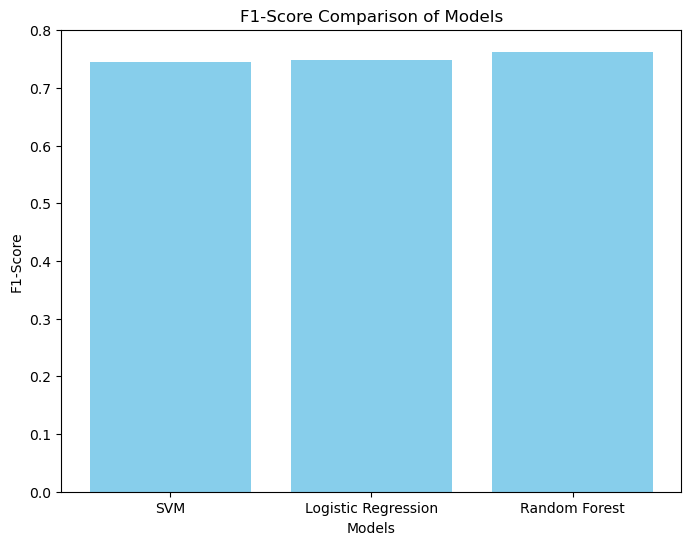

In [64]:
plt.figure(figsize=(8, 6))
models = metrics_df['Model']
f1_scores = metrics_df['F1-Score']

plt.bar(models, f1_scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('F1-Score')
plt.title('F1-Score Comparison of Models')
plt.show()


## Insights

### Use precision and recall to evaluate how well the model identifies disaster tweets (positive class).
### Use F1-score to balance between precision and recall when there’s a trade-off.
### Use accuracy to understand overall correctness, but it may be less reliable for imbalanced datasets.

## - Visualize the performance metrics using confusion matrices, ROC curves, and precision recall curves.

## 1. Confusion Matrix

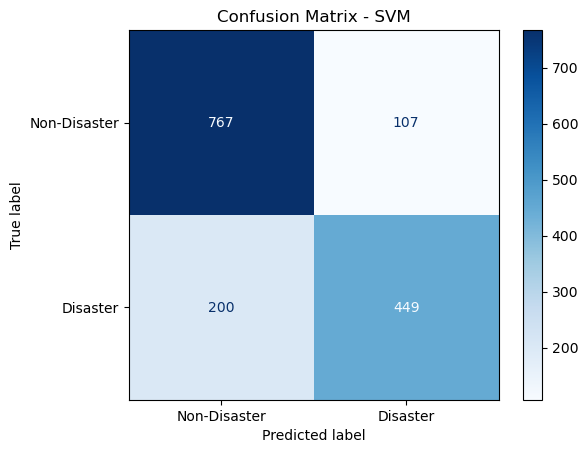

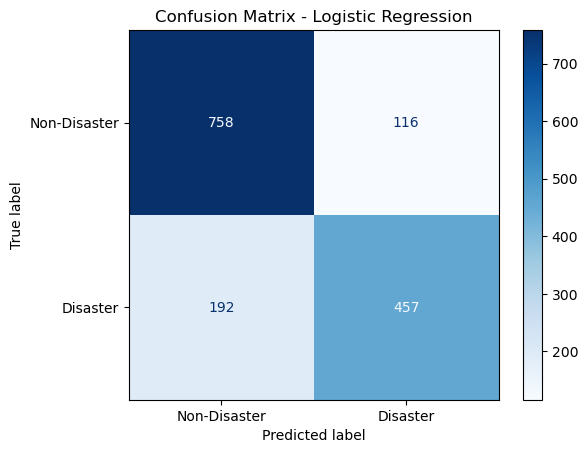

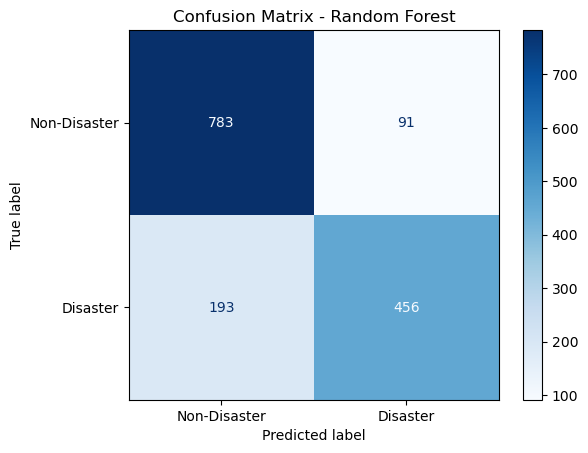

In [66]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute and display the confusion matrix for each model
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Disaster', 'Disaster'])
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Example for SVM
plot_confusion_matrix(y_test, y_pred_svm, "SVM")
plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")


### Confusion Matrix Analysis

### Random Forest Model Performance

### Key Observations:

### High True Positive Rate (TPR) and True Negative Rate (TNR): The model has a high TPR (456/649 = 70.3%) and TNR (783/874 = 89.6%), indicating that it is good at correctly identifying both disaster and non-disaster tweets.

### Moderate False Positive Rate (FPR) and False Negative Rate (FNR): The model has a moderate FPR (91/874 = 10.4%) and FNR (193/649 = 29.7%).

## 2. ROC Curve

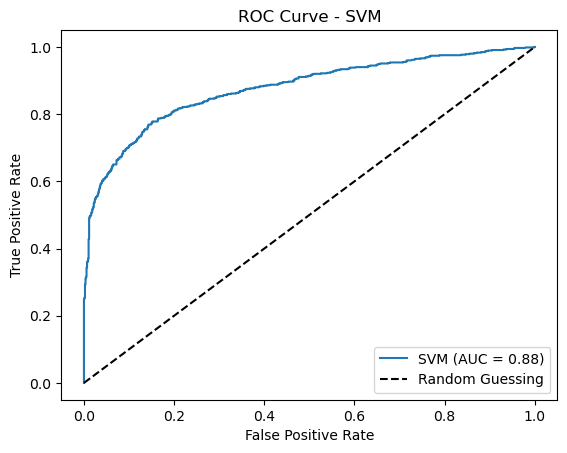

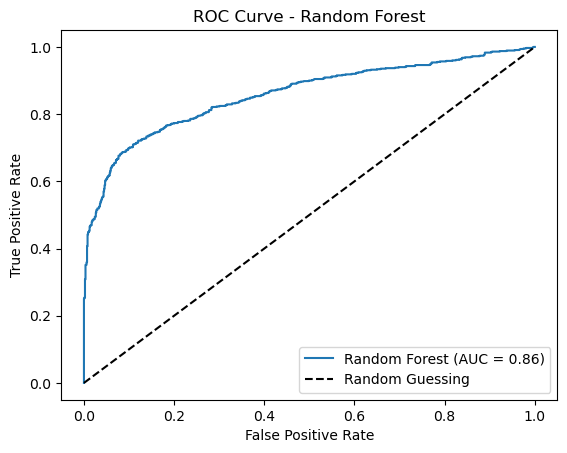

In [72]:
from sklearn.metrics import roc_curve, roc_auc_score

# Function to plot the ROC curve
def plot_roc_curve(y_true, y_pred_proba, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    auc_score = roc_auc_score(y_true, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()

# Assuming models have a `predict_proba` method for probabilities
plot_roc_curve(y_test, best_svm.decision_function(X_test), "SVM")
plot_roc_curve(y_test, best_rf.predict_proba(X_test)[:, 1], "Random Forest")
#plot_roc_curve(y_test, best_lr.predict_proba(X_test)[:, 1], "Logistic Regression")



## 3. Precision-Recall Curve

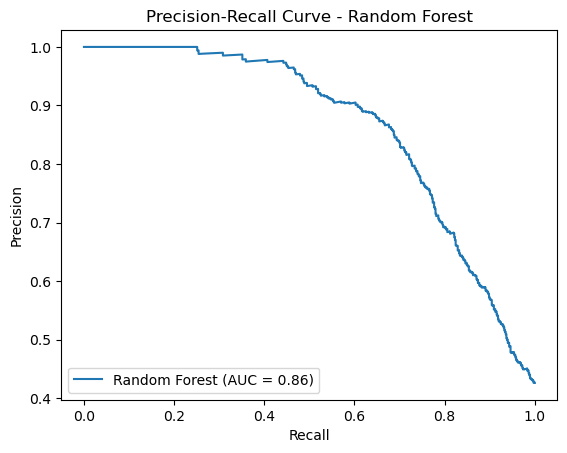

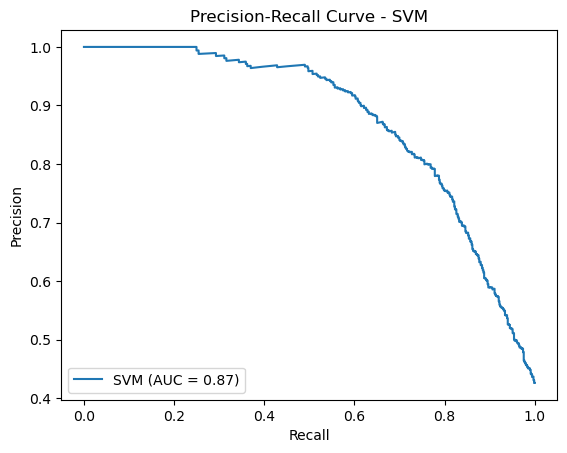

In [71]:
from sklearn.metrics import precision_recall_curve, auc

# Function to plot the Precision-Recall curve
def plot_precision_recall_curve(y_true, y_pred_proba, model_name):
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred_proba)
    pr_auc = auc(recall, precision)
    plt.figure()
    plt.plot(recall, precision, label=f'{model_name} (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.legend(loc='lower left')
    plt.show()

# Plot Precision-Recall curves
plot_precision_recall_curve(y_test, best_rf.predict_proba(X_test)[:, 1], "Random Forest")
plot_precision_recall_curve(y_test, best_svm.decision_function(X_test), "SVM")
#plot_precision_recall_curve(y_test, best_lr.predict_proba(X_test)[:, 1], "Logistic Regression")



## - Compare the performance of different models to select the best-performing one for deployment


In [85]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss

# Function to calculate and display metrics
def evaluate_model(name, model, X_test, y_test, y_pred, y_pred_proba=None):
    metrics = {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
    }
    if y_pred_proba is not None:
        metrics["ROC-AUC"] = roc_auc_score(y_test, y_pred_proba)
        metrics["Log-Loss"] = log_loss(y_test, y_pred_proba)
    return metrics

# Evaluate each model
results = []

# Evaluate SVM
y_pred_svm = best_svm.predict(X_test)
y_pred_proba_svm = best_svm.decision_function(X_test)  # Decision function for SVM
results.append(evaluate_model("SVM", best_svm, X_test, y_test, y_pred_svm, y_pred_proba_svm))

# Evaluate Logistic Regression
#y_pred_lr = best_lr.predict(X_test)
#y_pred_proba_lr = best_lr.predict_proba(X_test)[:, 1]  # Probabilities for Logistic Regression
#results.append(evaluate_model("Logistic Regression", best_lr, X_test, y_test, y_pred_lr, y_pred_proba_lr))

# Evaluate Random Forest
y_pred_rf = best_rf.predict(X_test)
y_pred_proba_rf = best_rf.predict_proba(X_test)[:, 1]  # Probabilities for Random Forest
results.append(evaluate_model("Random Forest", best_rf, X_test, y_test, y_pred_rf, y_pred_proba_rf))

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)

# Display results
print(results_df)


           Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC  Log-Loss
0            SVM  0.817466   0.854685  0.688752  0.762799  0.875826  5.128054
1  Random Forest  0.814183   0.841418  0.694915  0.761181  0.857713  0.465435


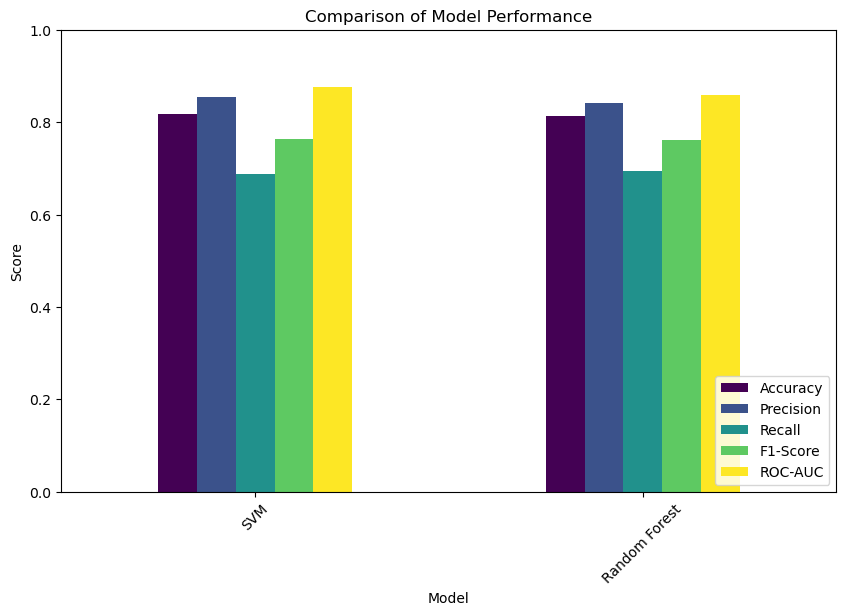

In [76]:
# Plot comparison
metrics_to_plot = ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]

# Filter only relevant columns
plot_data = results_df.set_index("Model")[metrics_to_plot]

# Plot
plot_data.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title("Comparison of Model Performance")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.ylim(0, 1)  # All metrics are between 0 and 1
plt.legend(loc="lower right")
plt.show()


### if we prioritize accuracy and ROC-AUC, Support Vector Machine (SVM) appears to be the best for deployment.

## Task: Model Validation

## Validate the selected model on the testing dataset to assess its generalization ability

In [81]:
# Make predictions on test data
y_pred_test = best_rf.predict(X_test)  # Predicted classes
y_pred_proba_test = best_rf.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class


In [86]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.metrics import precision_recall_curve, auc

# Compute metrics
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, y_pred_proba_test)

# Precision-Recall AUC
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_proba_test)
pr_auc = auc(recall_curve, precision_curve)

# Print metrics
print("Validation Metrics on Test Data:")
print(f"  Accuracy: {accuracy:.2f}")
print(f"  Precision: {precision:.2f}")
print(f"  Recall: {recall:.2f}")
print(f"  F1-Score: {f1:.2f}")
print(f"  ROC-AUC: {roc_auc:.2f}")
print(f"  PR-AUC: {pr_auc:.2f}")


Validation Metrics on Test Data:
  Accuracy: 0.81
  Precision: 0.84
  Recall: 0.69
  F1-Score: 0.76
  ROC-AUC: 0.86
  PR-AUC: 0.86


### Interpretation
### Accuracy: Measures the overall correctness of predictions.
### Precision: Indicates how many predicted disasters are actually disasters.
### Recall: Indicates how many actual disasters were correctly identified.
### F1-Score: Balances precision and recall, useful for imbalanced datasets.
### ROC-AUC: Shows how well the model distinguishes between the two classes.
### PR-AUC: Useful when focusing on the minority class (e.g., disasters).

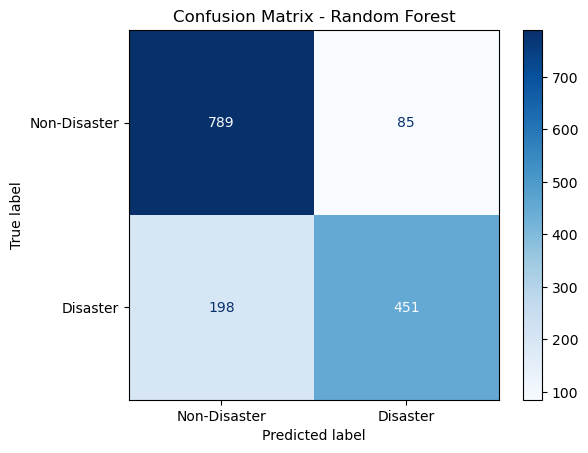

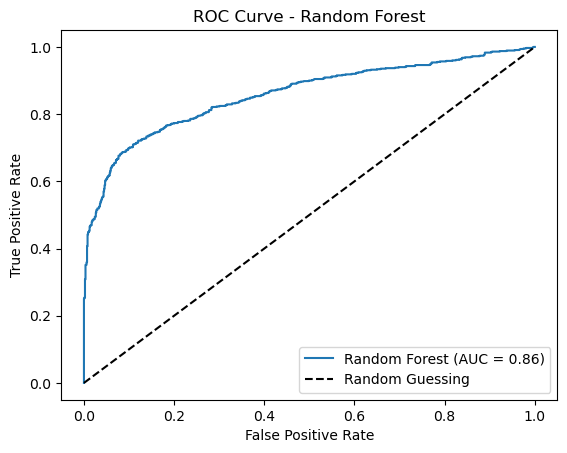

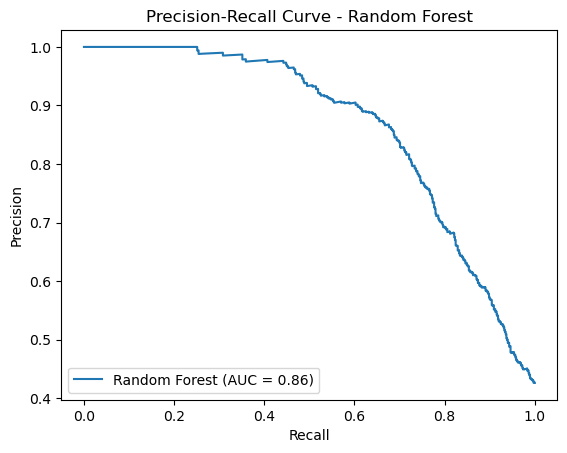

In [83]:
# Confusion Matrix
plot_confusion_matrix(y_test, y_pred_test, "Random Forest")

# ROC Curve
plot_roc_curve(y_test, y_pred_proba_test, "Random Forest")

# Precision-Recall Curve
plot_precision_recall_curve(y_test, y_pred_proba_test, "Random Forest")


## Check for potential issues like overfitting or underfitting and adjust the model if necessary.


In [89]:
# Print the performance metrics on training and test sets
print("Training Metrics:")
print(f"Accuracy: {accuracy_score(y_train, best_rf.predict(X_train)):.2f}")
print(f"F1-Score: {f1_score(y_train, best_rf.predict(X_train)):.2f}")

print("\nTest Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"F1-Score: {f1:.2f}")


Training Metrics:
Accuracy: 0.95
F1-Score: 0.94

Test Metrics:
Accuracy: 0.81
F1-Score: 0.76


### Adjustments for Random Forest

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# Adjust the Random Forest hyperparameters
adjusted_rf = RandomForestClassifier(
    n_estimators=48,       # Set the number of trees
    max_depth=5,           # Limit the depth of each tree
    min_samples_split=10,   # Minimum samples to split a node
    min_samples_leaf=5,     # Minimum samples at a leaf node
    random_state=42         # For reproducibility
)

# Train the adjusted model
adjusted_rf.fit(X_train, y_train)

# Evaluate on the training set
y_train_pred = adjusted_rf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Evaluate on the test set
y_test_pred = adjusted_rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print the results
print("Adjusted Random Forest Metrics:")
print(f"Training Accuracy: {train_accuracy:.2f}, Training F1-Score: {train_f1:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}, Test F1-Score: {test_f1:.2f}")


Adjusted Random Forest Metrics:
Training Accuracy: 0.81, Training F1-Score: 0.76
Test Accuracy: 0.80, Test F1-Score: 0.74


### Here, we can see that  Adjusted Model - Training Accuracy: 0.81, Test Accuracy: 0.80

## Ensure that the model performs well on unseen data and is robust to variations in the tweet text.

In [106]:
# Perform cross-validation
cv_scores = cross_val_score(adjusted_rf, X_train, y_train, cv=5, scoring='f1')

print(f"Cross-Validation F1-Score: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")


Cross-Validation F1-Score: 0.71 ± 0.01


## Part 4: Deployment with Web Interface

## Serialize the trained model into a format suitable for deployment, such as a joblib file.

In [109]:
import joblib

# Save the trained model to a file
joblib_file = "trained_model_rf.joblib"
joblib.dump(adjusted_rf, joblib_file)

print(f"Model serialized and saved as {joblib_file}")



Model serialized and saved as trained_model_rf.joblib


In [110]:
# Load the saved model
loaded_model = joblib.load(joblib_file)

# Test the loaded model on the test dataset
y_test_pred = loaded_model.predict(X_test)

# Evaluate performance
from sklearn.metrics import accuracy_score, f1_score
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print(f"Loaded Model - Test Accuracy: {test_accuracy:.2f}, Test F1-Score: {test_f1:.2f}")


Loaded Model - Test Accuracy: 0.80, Test F1-Score: 0.74
